In [88]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt

In [89]:
with open('transactions.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

In [90]:
status[0]

{'accountNumber': '733493772',
 'accountOpenDate': '2014-08-03',
 'acqCountry': 'US',
 'availableMoney': 5000.0,
 'cardCVV': '492',
 'cardLast4Digits': '9184',
 'cardPresent': False,
 'creditLimit': 5000.0,
 'currentBalance': 0.0,
 'currentExpDate': '04/2020',
 'customerId': '733493772',
 'dateOfLastAddressChange': '2014-08-03',
 'echoBuffer': '',
 'enteredCVV': '492',
 'expirationDateKeyInMatch': False,
 'isFraud': True,
 'merchantCategoryCode': 'rideshare',
 'merchantCity': '',
 'merchantCountryCode': 'US',
 'merchantName': 'Lyft',
 'merchantState': '',
 'merchantZip': '',
 'posConditionCode': '01',
 'posEntryMode': '05',
 'posOnPremises': '',
 'recurringAuthInd': '',
 'transactionAmount': 111.33,
 'transactionDateTime': '2016-01-08T19:04:50',
 'transactionType': 'PURCHASE'}

In [91]:
transaction=pd.DataFrame(status)

In [92]:
len(transaction)

641914

In [93]:
len(transaction.columns)

29

In [94]:
transaction.columns

Index(['accountNumber', 'accountOpenDate', 'acqCountry', 'availableMoney',
       'cardCVV', 'cardLast4Digits', 'cardPresent', 'creditLimit',
       'currentBalance', 'currentExpDate', 'customerId',
       'dateOfLastAddressChange', 'echoBuffer', 'enteredCVV',
       'expirationDateKeyInMatch', 'isFraud', 'merchantCategoryCode',
       'merchantCity', 'merchantCountryCode', 'merchantName', 'merchantState',
       'merchantZip', 'posConditionCode', 'posEntryMode', 'posOnPremises',
       'recurringAuthInd', 'transactionAmount', 'transactionDateTime',
       'transactionType'],
      dtype='object')

In [95]:
transaction.dtypes

accountNumber                object
accountOpenDate              object
acqCountry                   object
availableMoney              float64
cardCVV                      object
cardLast4Digits              object
cardPresent                    bool
creditLimit                 float64
currentBalance              float64
currentExpDate               object
customerId                   object
dateOfLastAddressChange      object
echoBuffer                   object
enteredCVV                   object
expirationDateKeyInMatch       bool
isFraud                        bool
merchantCategoryCode         object
merchantCity                 object
merchantCountryCode          object
merchantName                 object
merchantState                object
merchantZip                  object
posConditionCode             object
posEntryMode                 object
posOnPremises                object
recurringAuthInd             object
transactionAmount           float64
transactionDateTime         

In [96]:
pd.set_option('display.max_columns', None)

In [97]:
transaction.head()

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,echoBuffer,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCity,merchantCountryCode,merchantName,merchantState,merchantZip,posConditionCode,posEntryMode,posOnPremises,recurringAuthInd,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,05,,,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023,733493772,2014-08-03,,492,False,False,rideshare,,US,Uber,,,01,09,,,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,05,,,187.40,2016-01-11T13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,09/2029,733493772,2014-08-03,,492,False,True,rideshare,,US,Lyft,,,01,02,,,227.34,2016-01-11T22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,10/2024,733493772,2014-08-03,,492,False,False,rideshare,,US,Lyft,,,01,02,,,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION


In [47]:
transaction=(transaction.replace(r'^\s*$', np.nan, regex=True))

In [52]:
transaction.isnull().sum(axis=0)

accountNumber                    0
accountOpenDate                  0
acqCountry                    3913
availableMoney                   0
cardCVV                          0
cardLast4Digits                  0
cardPresent                      0
creditLimit                      0
currentBalance                   0
currentExpDate                   0
customerId                       0
dateOfLastAddressChange          0
echoBuffer                  641914
enteredCVV                       0
expirationDateKeyInMatch         0
isFraud                          0
merchantCategoryCode             0
merchantCity                641914
merchantCountryCode            624
merchantName                     0
merchantState               641914
merchantZip                 641914
posConditionCode               287
posEntryMode                  3345
posOnPremises               641914
recurringAuthInd            641914
transactionAmount                0
transactionDateTime              0
transactionType     

In [98]:
transaction['acqCountry'].unique()

array(['US', '', 'PR', 'MEX', 'CAN'], dtype=object)

In [99]:
transaction['transactionType'].unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', ''], dtype=object)

In [87]:
display(transaction.describe())


,availableMoney,creditLimit,currentBalance,transactionAmount
count,641914.000000,641914.000000,641914.000000,641914.000000
mean,6652.828573,10697.210608,4044.382035,135.162497
std,9227.132275,11460.359133,5945.510224,147.053302
min,-1244.930000,250.000000,0.000000,0.000000
25%,1114.970000,5000.000000,502.442500,32.320000
50%,3578.165000,7500.000000,2151.860000,85.800000
75%,8169.185000,15000.000000,5005.890000,189.030000
max,50000.000000,50000.000000,47496.500000,1825.250000


In [54]:
transaction=transaction.drop(['merchantCity','echoBuffer','merchantState','merchantZip','posOnPremises','recurringAuthInd'],axis=1)

In [57]:
transaction.head(500)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,...,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020,...,False,True,rideshare,US,Lyft,01,05,111.33,2016-01-08T19:04:50,PURCHASE
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023,...,False,False,rideshare,US,Uber,01,09,24.75,2016-01-09T22:32:39,PURCHASE
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027,...,False,False,rideshare,US,Lyft,01,05,187.40,2016-01-11T13:36:55,PURCHASE
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,09/2029,...,False,True,rideshare,US,Lyft,01,02,227.34,2016-01-11T22:47:46,PURCHASE
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,10/2024,...,False,False,rideshare,US,Lyft,01,02,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION
5,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,02/2021,...,False,False,online_gifts,US,Fresh eCards,01,05,9.80,2016-01-16T21:35:27,PURCHASE
6,733493772,2014-08-03,NaN,4439.38,492,9184,False,5000.0,560.62,01/2026,...,False,False,rideshare,US,Uber,01,05,247.99,2016-01-24T07:54:01,PURCHASE
7,733493772,2014-08-03,US,4191.39,492,9184,False,5000.0,808.61,12/2031,...,False,False,personal care,US,Universe Massage #95463,01,05,0.00,2016-01-26T05:28:24,ADDRESS_VERIFICATION
8,733493772,2014-08-03,US,4191.39,492,9184,True,5000.0,808.61,04/2024,...,False,False,personal care,US,Universe Massage #70014,01,05,11.54,2016-01-26T12:18:14,PURCHASE
9,733493772,2014-08-03,US,4179.85,492,9184,True,5000.0,820.15,04/2024,...,False,False,personal care,US,Universe Massage #70014,01,05,11.54,2016-01-26T12:19:15,REVERSAL


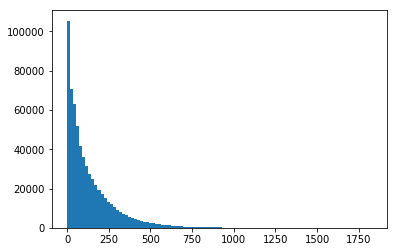

In [43]:
plt.hist(transaction['transactionAmount'],bins=100)
plt.show()

### It is a nice histogram

Long tail distribution

In [61]:
transaction['duplicated'] = np.where((transaction['transactionType']!='REVERSAL')&(transaction['merchantCategoryCode'] == transaction['merchantCategoryCode'].shift(1))&(transaction['merchantName'] == transaction['merchantName'].shift(1)) & ((transaction['transactionAmount'] == transaction['transactionAmount'].shift(1)) & (transaction['accountNumber'] == transaction['accountNumber'])),"True","False")


In [71]:
transaction.head(5)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType,duplicated
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,05,111.33,2016-01-08T19:04:50,PURCHASE,False
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023,733493772,2014-08-03,492,False,False,rideshare,US,Uber,01,09,24.75,2016-01-09T22:32:39,PURCHASE,False
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,05,187.40,2016-01-11T13:36:55,PURCHASE,False
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,09/2029,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,02,227.34,2016-01-11T22:47:46,PURCHASE,False
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,10/2024,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,02,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION,False


In [70]:
rev=transaction[transaction['transactionType']=='REVERSAL']

In [69]:
dupl=transaction[transaction['duplicated']=='True']

In [100]:
dupl

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType,duplicated
120,733493772,2014-08-03,US,3811.33,492,9184,False,5000.0,1188.67,09/2020,733493772,2016-06-26,492,False,False,rideshare,US,Lyft,01,05,103.81,2016-09-08T07:51:27,PURCHASE,True
186,578754168,2015-10-21,US,5000.00,413,5279,True,5000.0,0.00,06/2029,578754168,2015-10-21,413,False,False,fuel,US,Shell Gas #69785,01,05,23.33,2016-05-12T13:02:40,PURCHASE,True
205,578754168,2015-10-21,US,4976.67,413,5279,True,5000.0,23.33,06/2029,578754168,2015-10-21,413,False,False,fuel,US,Shell Gas #69785,01,05,23.33,2016-10-17T23:46:41,PURCHASE,True
210,578754168,2015-10-21,US,4920.24,413,5279,True,5000.0,79.76,06/2029,578754168,2015-10-21,413,False,False,fuel,US,Shell Gas #69785,01,05,23.33,2016-11-28T07:38:19,PURCHASE,True
243,550655231,2013-03-15,US,250.00,631,9626,True,250.0,0.00,12/2025,550655231,2013-03-15,631,False,False,fuel,US,Mobil Gas #610818,01,05,27.04,2016-08-05T14:57:08,PURCHASE,True
300,965952336,2013-01-11,US,1807.13,286,4029,False,7500.0,5692.87,10/2027,965952336,2016-02-08,286,False,False,online_retail,US,ebay.com,01,05,394.24,2016-03-10T23:06:20,PURCHASE,True
346,965952336,2013-01-11,US,609.35,286,4029,False,7500.0,6890.65,02/2029,965952336,2016-02-08,286,False,False,online_retail,US,ebay.com,01,02,20.35,2016-06-11T22:52:55,PURCHASE,True
399,965952336,2013-01-11,US,1242.15,286,4029,True,7500.0,6257.85,05/2028,965952336,2016-02-08,286,False,False,hotels,US,Rodeway Inn #700975,01,05,161.08,2016-09-10T02:50:47,PURCHASE,True
431,965952336,2013-01-11,US,3401.57,258,1562,False,7500.0,4098.43,06/2028,965952336,2016-02-08,258,False,False,online_retail,US,gap.com,99,02,37.62,2016-11-02T13:45:49,PURCHASE,True
455,523868625,2012-12-01,US,20000.00,687,3332,False,20000.0,0.00,01/2027,523868625,2012-12-01,687,False,False,mobileapps,US,Apple iTunes,01,09,3.29,2016-03-30T06:31:36,PURCHASE,True


In [72]:
transaction.head(5)

,accountNumber,accountOpenDate,acqCountry,availableMoney,cardCVV,cardLast4Digits,cardPresent,creditLimit,currentBalance,currentExpDate,customerId,dateOfLastAddressChange,enteredCVV,expirationDateKeyInMatch,isFraud,merchantCategoryCode,merchantCountryCode,merchantName,posConditionCode,posEntryMode,transactionAmount,transactionDateTime,transactionType,duplicated
0,733493772,2014-08-03,US,5000.00,492,9184,False,5000.0,0.00,04/2020,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,05,111.33,2016-01-08T19:04:50,PURCHASE,False
1,733493772,2014-08-03,US,4888.67,492,9184,False,5000.0,111.33,06/2023,733493772,2014-08-03,492,False,False,rideshare,US,Uber,01,09,24.75,2016-01-09T22:32:39,PURCHASE,False
2,733493772,2014-08-03,US,4863.92,492,9184,False,5000.0,136.08,12/2027,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,05,187.40,2016-01-11T13:36:55,PURCHASE,False
3,733493772,2014-08-03,US,4676.52,492,9184,False,5000.0,323.48,09/2029,733493772,2014-08-03,492,False,True,rideshare,US,Lyft,01,02,227.34,2016-01-11T22:47:46,PURCHASE,False
4,733493772,2014-08-03,US,4449.18,492,9184,False,5000.0,550.82,10/2024,733493772,2014-08-03,492,False,False,rideshare,US,Lyft,01,02,0.00,2016-01-16T01:41:11,ADDRESS_VERIFICATION,False


In [86]:
transaction.groupby('isFraud').size()/len(transaction)*100


isFraud
False    98.239328
True      1.760672
dtype: float64

Robust Random Cut Forest